In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

from Quantum_Kernel import *
import warnings
warnings.filterwarnings("ignore")

In [125]:
sto_index_sets = []
sto_index_test_sets =[]
datasets_X_S =[]
datasets_y =[]
gram_gaussian_set =[]
gram_gaussian_test_set = []
gram_zz_kernel_set = []
gram_zz_kernel_test_set = [] 
gram_kernel_set = []
gram_kernel_test_set = []
folder = "svm_data4"

for i in range(5):
    sto_index_sets += [pd.read_csv(folder + "/sto_index_sets"+str(i)+".csv").iloc[:,1].tolist()]
    sto_index_test_sets += [pd.read_csv(folder + "/sto_index_test_sets"+str(i)+".csv").iloc[:,1].tolist()]
    datasets_X_S += [pd.read_csv(folder + "/datasets_X_S"+str(i)+".csv").iloc[:,1:].values.tolist()]
    datasets_y += [pd.read_csv(folder + "/datasets_y"+str(i)+".csv").iloc[:,1].values.tolist()]
    
    gram_gaussian_set += [pd.read_csv(folder + "/gram_gaussian_"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_gaussian_test_set += [pd.read_csv(folder + "/gram_gaussian_test"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_zz_kernel_set += [pd.read_csv(folder + "/gram_zz_kernel"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_zz_kernel_test_set += [pd.read_csv(folder + "/gram_zz_kernel_test"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_kernel_set += [pd.read_csv(folder + "/gram_kernel"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_kernel_test_set += [pd.read_csv(folder + "/gram_kernel_test"+str(i)+".csv").iloc[:,1:].values.tolist()]

In [126]:
i=0
comp=3
gram_gaussian_set = []
gram_gaussian_test_set = []

for i in range(5):

    sto_ind = sto_index_sets[i]
    data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
    data_sto = np.array(datasets_X_S[i])[sto_ind,:]

    sto_ind = sto_index_test_sets[i]
    data_sto_test_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
    data_sto_test = np.array(datasets_X_S[i])[sto_ind,:]

    gram_gaussian_set += [Gram_gaussian(data=data_sto,comp=comp)]
    gram_gaussian_test_set += [Gram_gaussian_test(data_sto,data_sto_test,comp=comp)]

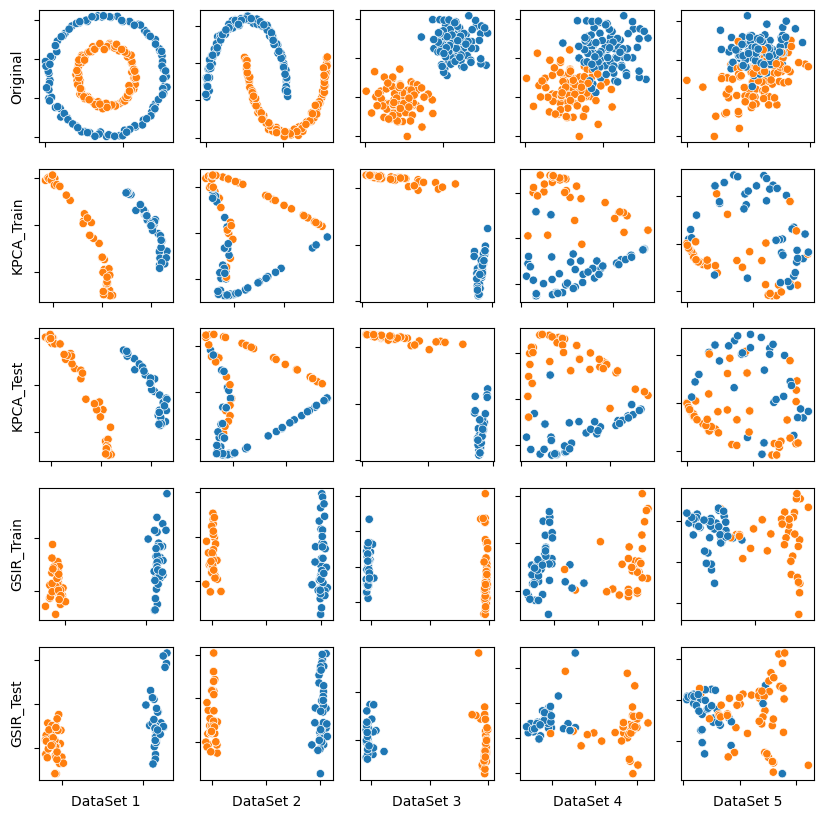

In [127]:
kernel_set = gram_gaussian_set
kernel_test_set = gram_gaussian_test_set
kpca = KPCA()
gsir = GSIR(0.01)

fig,ax = plt.subplots(5,5,figsize = (10,10))
    
for i in range(5):
    sto_ind = sto_index_sets[i]
    data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
    sto_ind = sto_index_test_sets[i]
    data_sto_test_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
    
    plot_data = pd.DataFrame(datasets_X_S[i])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = datasets_y[i]
    g1 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[0,i])
    g1.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    kernel_matrix = kernel_set[i]
    kpca.fit(kernel_matrix)
    plot_data = pd.DataFrame(kpca.transform(kernel_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_y
    g2 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[1,i])
    g2.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    gsir.fit(kernel_matrix,data_sto_y)
    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_y
    g3 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[3,i])
    g3.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    kernel_test_matrix = kernel_test_set[i]
    plot_data = pd.DataFrame(kpca.transform(kernel_test_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_test_y
    g4 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[2,i])
    g4.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_test_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_test_y
    g5 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[4,i])
    g5.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])
ylabel_list = ["Original","KPCA_Train","KPCA_Test","GSIR_Train","GSIR_Test"]
for i in range(5):
    ax[i,0].set(ylabel = ylabel_list[i])

xlabel_list = ["DataSet 1","DataSet 2","DataSet 3","DataSet 4","DataSet 5"]
for i in range(5):
    ax[4,i].set(xlabel = xlabel_list[i])


plt.savefig(folder + "/DR_gaussian_kernel.jpg")
plt.show()

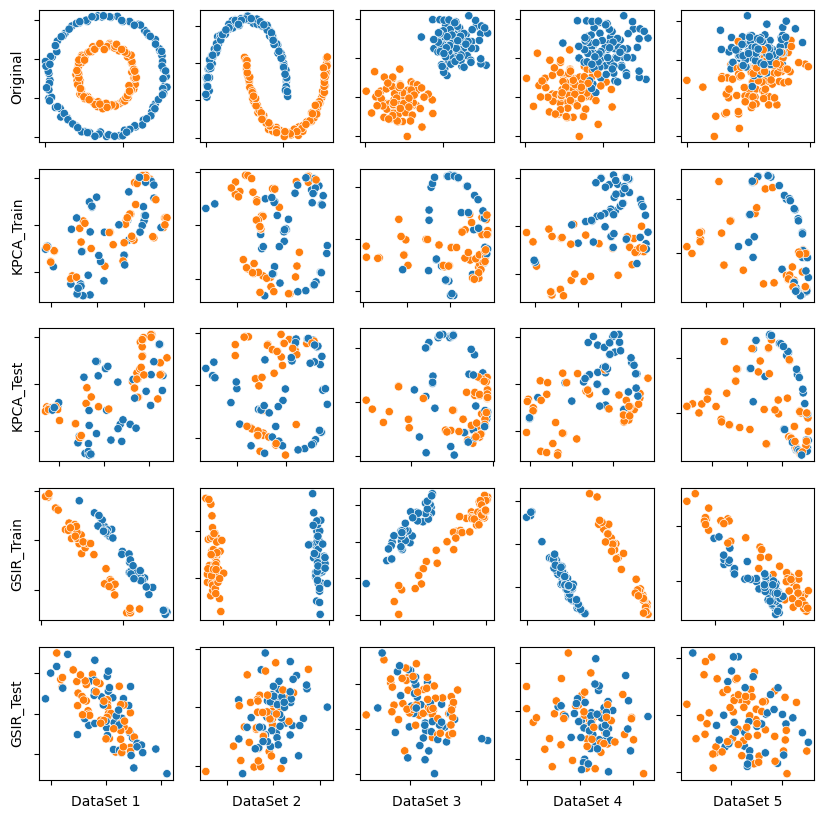

In [128]:
kernel_set = gram_zz_kernel_set
kernel_test_set = gram_zz_kernel_test_set
kpca = KPCA()
gsir = GSIR(0.001,0.001)

fig,ax = plt.subplots(5,5,figsize = (10,10))
    
for i in range(5):
    sto_ind = sto_index_sets[i]
    data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
    sto_ind = sto_index_test_sets[i]
    data_sto_test_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
    
    plot_data = pd.DataFrame(datasets_X_S[i])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = datasets_y[i]
    g1 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[0,i])
    g1.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    kernel_matrix = kernel_set[i]
    kpca.fit(kernel_matrix)
    plot_data = pd.DataFrame(kpca.transform(kernel_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_y
    g2 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[1,i])
    g2.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    gsir.fit(kernel_matrix,data_sto_y)
    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_y
    g3 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[3,i])
    g3.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    kernel_test_matrix = kernel_test_set[i]
    plot_data = pd.DataFrame(kpca.transform(kernel_test_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_test_y
    g4 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[2,i])
    g4.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_test_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_test_y
    g5 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[4,i])
    g5.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

ylabel_list = ["Original","KPCA_Train","KPCA_Test","GSIR_Train","GSIR_Test"]
for i in range(5):
    ax[i,0].set(ylabel = ylabel_list[i])

xlabel_list = ["DataSet 1","DataSet 2","DataSet 3","DataSet 4","DataSet 5"]
for i in range(5):
    ax[4,i].set(xlabel = xlabel_list[i])



plt.savefig(folder + "/DR_zz_kernel.jpg")
plt.show()

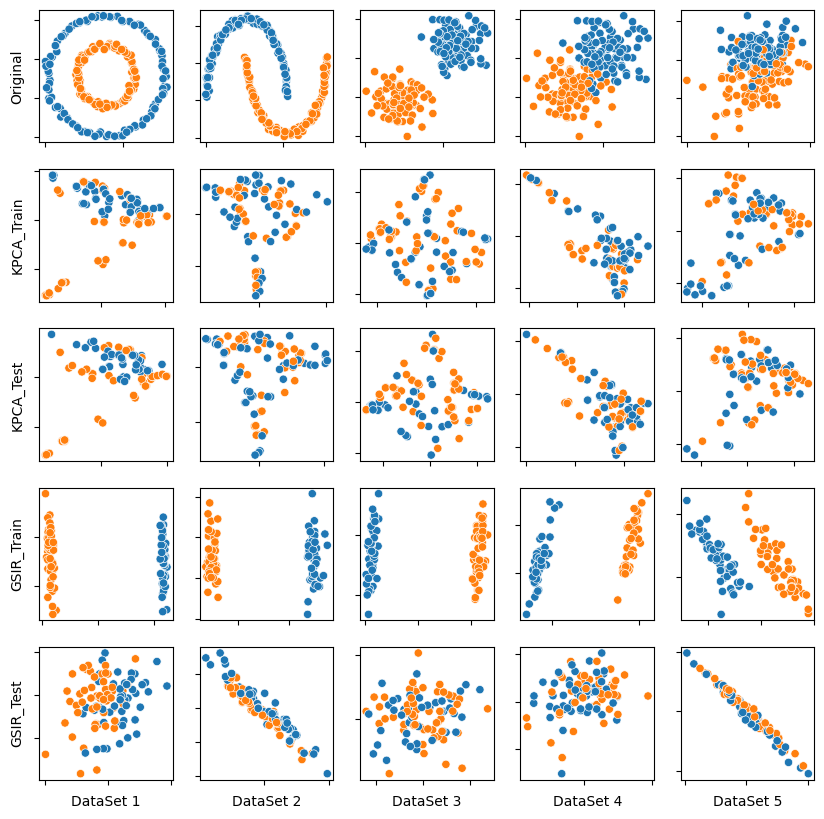

In [129]:
kernel_set = gram_kernel_set
kernel_test_set = gram_kernel_test_set
kpca = KPCA()
gsir = GSIR(0.001,0.001)

fig,ax = plt.subplots(5,5,figsize = (10,10))
    
for i in range(5):
    sto_ind = sto_index_sets[i]
    data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
    sto_ind = sto_index_test_sets[i]
    data_sto_test_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
    
    plot_data = pd.DataFrame(datasets_X_S[i])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = datasets_y[i]
    g1 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[0,i])
    g1.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    kernel_matrix = kernel_set[i]
    kpca.fit(kernel_matrix)
    plot_data = pd.DataFrame(kpca.transform(kernel_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_y
    g2 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[1,i])
    g2.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    gsir.fit(kernel_matrix,data_sto_y)
    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_y
    g3 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[3,i])
    g3.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    kernel_test_matrix = kernel_test_set[i]
    plot_data = pd.DataFrame(kpca.transform(kernel_test_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_test_y
    g4 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[2,i])
    g4.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_test_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_test_y
    g5 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[4,i])
    g5.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

ylabel_list = ["Original","KPCA_Train","KPCA_Test","GSIR_Train","GSIR_Test"]
for i in range(5):
    ax[i,0].set(ylabel = ylabel_list[i])

xlabel_list = ["DataSet 1","DataSet 2","DataSet 3","DataSet 4","DataSet 5"]
for i in range(5):
    ax[4,i].set(xlabel = xlabel_list[i])



plt.savefig(folder + "/DR_custom_kernel.jpg")
plt.show()

In [130]:
kernel_list = [gram_gaussian_set,gram_zz_kernel_set,gram_kernel_set]
kernel_test_list = [gram_gaussian_test_set,gram_zz_kernel_test_set,gram_gaussian_test_set]
total_result = []
for j in range(3):
    kernel_set = kernel_list[j]
    kernel_test_set = kernel_test_list[j] 

    train_score = []
    test_score = []
    svm = SVM(1)

    for i in range(5):
        sto_ind = sto_index_sets[i]
        data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
        y_s = 2*(data_sto_y.T-0.5).values[0]

        sto_ind = sto_index_test_sets[i]
        data_sto_test_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
        y_s_t= 2*(data_sto_test_y.T-0.5).values[0]

        kernel_matrix = kernel_set[i]
        kernel_test_matrix = kernel_test_set[i]

        svm.fit(kernel_matrix,y_s)
        train_score += [svm.score(kernel_matrix,y_s)]
        test_score += [svm.score(kernel_test_matrix,y_s_t)]


    result = pd.DataFrame([train_score,test_score])
    result.index = ["Train Score","Test Score"]
    result.columns = ["Data Set 1","Data Set 2","Data Set 3","Data Set 4","Data Set 5"]
    total_result += result.values.tolist()
total_result = pd.DataFrame(total_result)
total_result.index = ["Gaussian_Train","Gaussian_Test","zz_kernel_Train","zz_kerenl_Test","custom_kernel_Train","custom_kerenl_Test"]
total_result.columns = ["Data Set 1","Data Set 2","Data Set 3","Data Set 4","Data Set 5"]
total_result.to_csv(folder + "/SVM_Result.csv")

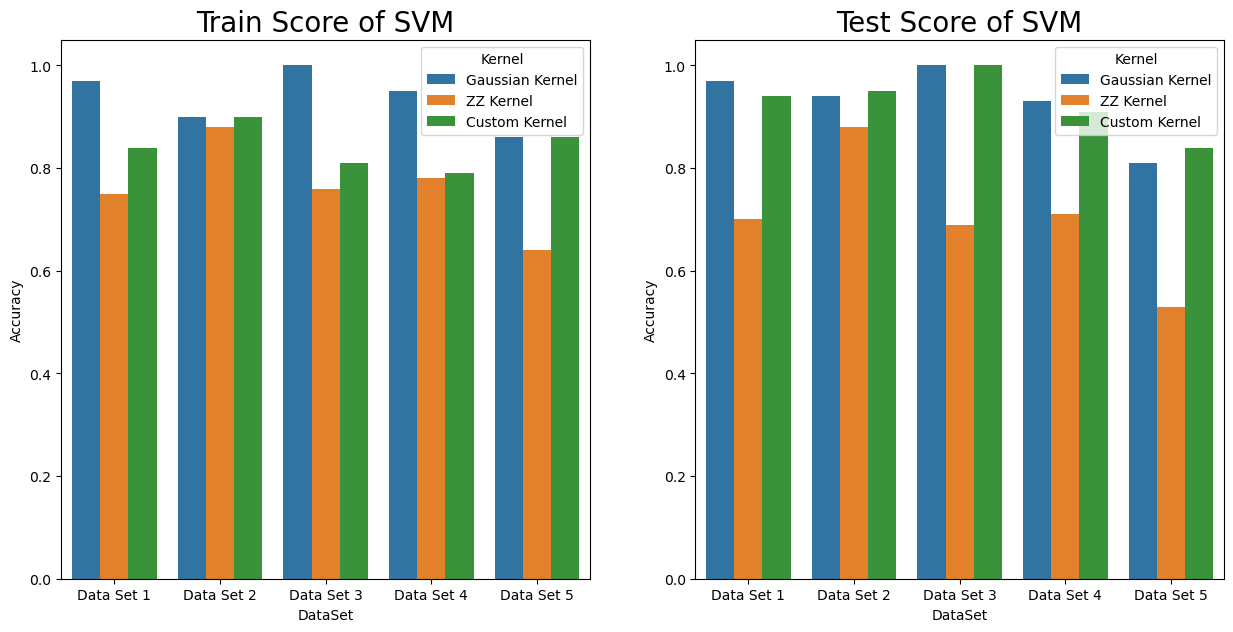

In [131]:
plot_train = pd.DataFrame(pd.concat([total_result.iloc[0,:],total_result.iloc[2,:],total_result.iloc[4,:]]))
plot_train.columns = ["Accuracy"]
plot_train["DataSet"] = plot_train.index
plot_train["Kernel"] = ["Gaussian Kernel" for i in range(5)]+["ZZ Kernel" for i in range(5)]+["Custom Kernel" for i in range(5)]

plot_test = pd.DataFrame(pd.concat([total_result.iloc[1,:],total_result.iloc[3,:],total_result.iloc[5,:]]))
plot_test.columns = ["Accuracy"]
plot_test["DataSet"] = plot_test.index
plot_test["Kernel"] = ["Gaussian Kernel" for i in range(5)]+["ZZ Kernel" for i in range(5)]+["Custom Kernel" for i in range(5)]

plt.figure(figsize = (15,7))
plt.subplot(121)
sns.barplot(data=plot_train, x="DataSet", y="Accuracy", hue="Kernel").axes.set_title(label="Train Score of SVM",fontsize=20)
plt.subplot(122)
sns.barplot(data=plot_test, x="DataSet", y="Accuracy", hue="Kernel").axes.set_title(label="Test Score of SVM",fontsize=20)

plt.savefig(folder + "/SVM_result.jpg")
plt.show()

In [132]:
total_result

Data Set 1  Data Set 2  Data Set 3  Data Set 4  \
Gaussian_Train             0.97        0.90        1.00        0.95   
Gaussian_Test              0.97        0.94        1.00        0.93   
zz_kernel_Train            0.75        0.88        0.76        0.78   
zz_kerenl_Test             0.70        0.88        0.69        0.71   
custom_kernel_Train        0.84        0.90        0.81        0.79   
custom_kerenl_Test         0.94        0.95        1.00        0.91   

                     Data Set 5  
Gaussian_Train             0.86  
Gaussian_Test              0.81  
zz_kernel_Train            0.64  
zz_kerenl_Test             0.53  
custom_kernel_Train        0.86  
custom_kerenl_Test         0.84

In [142]:
gram_kernel_set = []
gram_kernel_test_set = []
folder = "pendigit4"
sto_index = pd.read_csv(folder + "/sto_index.csv").iloc[:,1].tolist()
sto_index_test = pd.read_csv(folder + "/sto_test_index.csv").iloc[:,1].tolist()
datasets_X_S = pd.read_csv(folder + "/datasets_X_S.csv").iloc[:,1:]
datasets_y = pd.read_csv(folder + "/datasets_y.csv").iloc[:,1:]
    
for i in range(7):
    gram_kernel_set += [pd.read_csv(folder + "/gram_kernel"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_kernel_test_set += [pd.read_csv(folder + "/gram_kernel_test"+str(i)+".csv").iloc[:,1:].values.tolist()]


In [144]:

data_sto = np.array(datasets_X_S)[sto_ind,:]
data_sto_test = np.array(datasets_X_S)[sto_index_test,:]

In [148]:
comp=3

gram_kernel_set[0] = Gram_gaussian(data=data_sto,comp=comp)
gram_kernel_test_set[0] = Gram_gaussian_test(data_sto,data_sto_test,comp=comp)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [150]:
Gram_gaussian(data=data_sto,comp=comp)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [152]:
data = data_sto

In [170]:
n = data.shape[0];p = data.shape[1] 
U = np.matmul(data,data.T)
M = np.outer(np.diag(U),np.ones(shape=(n,1)))
K = M+M.T-2*U
sigma = (np.sum(np.sqrt(K))-np.trace(np.sqrt(K)))/n/(n-1)
gamma = comp/sigma/sigma
result = np.exp(-K*gamma)

In [171]:
M+M.T-2*U

array([[ 0.        ,  3.866911  , 20.30078929, ...,  2.30159175,
         4.99895463, 32.65062528],
       [ 3.866911  ,  0.        , 12.46629732, ...,  9.35638497,
        10.11140971, 28.34550384],
       [20.30078929, 12.46629732,  0.        , ..., 29.5466347 ,
        23.85483384, 12.35773167],
       ...,
       [ 2.30159175,  9.35638497, 29.5466347 , ...,  0.        ,
         2.75658051, 38.83886724],
       [ 4.99895463, 10.11140971, 23.85483384, ...,  2.75658051,
         0.        , 34.05704391],
       [32.65062528, 28.34550384, 12.35773167, ..., 38.83886724,
        34.05704391,  0.        ]])

In [166]:
sum(K<0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [158]:
np.sum(np.sqrt(K))

nan

In [149]:
gram_kernel_set

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 [[1.0,
   0.219,
   0.721,
   0.047,
   0.0,
   0.433,
   0.072,
   0.004,
   0.339,
   0.005,
   0.019,
   0.049,
   0.829,
   0.853,
   0.328,
   0.0,
   0.11,
   0.098,
   0.0,
   0.0,
   0.001,
   0.02,
   0.676,
   0.509,
   0.0,
   0.041,
   0.056,
   0.531,
   0.0,
   0.269,
   0.057,
   0.0,
   0.561,
   0.293,
   0.007,
   0.469,
   0.427,
   0.113,
   0.498,
   0.311,
   0.059,
   0.0,
   0.058,
   0.326,
   0.02,
   0.0,
   0.713,
   0.004,
   0.0,
   0.005,
   0.0,
   0.006,
   0.169,
   0.011,
   0.602,
   0.111,
   0.065,
   0.015,
   0.002,
   0.021,
   0.784,
   0.012,
   0.247,
   0.015,
   0.031,
   0.919,
   0.005,
   0.45,
   0.0,
   0.0,
   0.017,
   0.007,
   0.863,
   0.771,
   0.00

LinAlgError: Array must not contain infs or NaNs

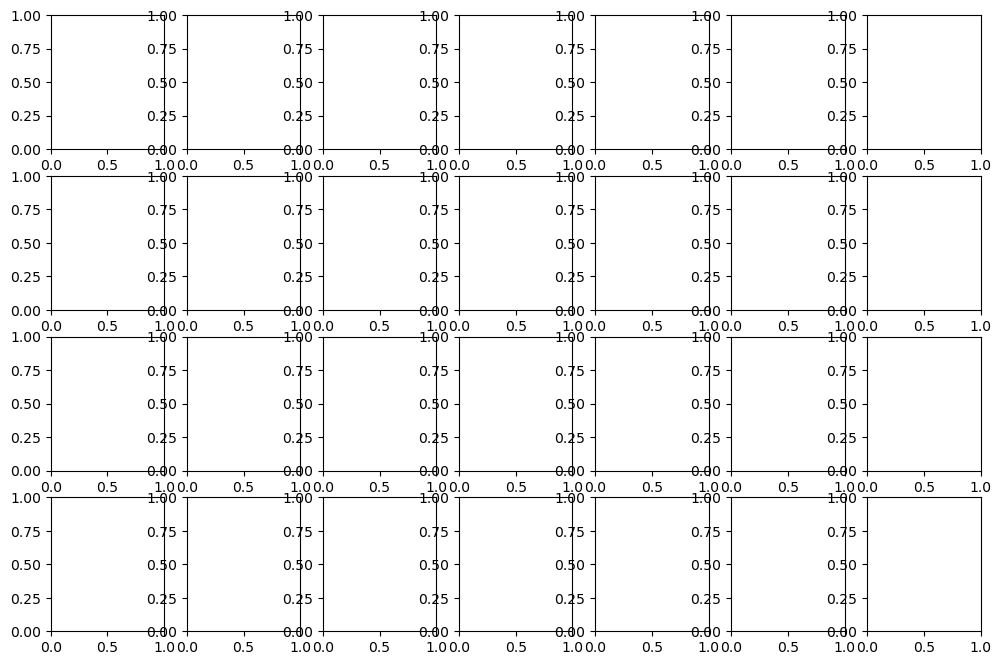

In [146]:
kernel_set = gram_kernel_set
kernel_test_set = gram_kernel_test_set
kpca = KPCA()
gsir = GSIR(0.001,0.001)
n_kernel = 7

data_sto_y =pd.DataFrame(datasets_y).iloc[sto_index,:].values.reshape(-1)

data_sto_test_y =pd.DataFrame(datasets_y).iloc[sto_index_test,:].values.reshape(-1)

fig,ax = plt.subplots(4,n_kernel ,figsize = (12,8))
    
for i in range(n_kernel):
    kernel_matrix = kernel_set[i]
    kpca.fit(kernel_matrix)
    plot_data = pd.DataFrame(kpca.transform(kernel_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_y
    g2 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[0,i])
    g2.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    gsir.fit(kernel_matrix,data_sto_y)
    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_y
    g3 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[2,i])
    g3.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])


    kernel_test_matrix = kernel_test_set[i]
    plot_data = pd.DataFrame(kpca.transform(kernel_test_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_test_y
    g4 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[1,i])
    g4.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_test_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_test_y
    g5 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[3,i])
    g5.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

ylabel_list = ["KPCA_Train","KPCA_Test","GSIR_Train","GSIR_Test"]
for i in range(4):
    ax[i,0].set(ylabel = ylabel_list[i])

xlabel_list = ["Gaussian","kernel_A","kernel_B","kernel_C","kernel_D","kernel_E","kernel_F","kernel_G"]
for i in range(n_kernel):
    ax[3,i].set(xlabel = xlabel_list[i])

plt.savefig(folder + "/DR_kernel.jpg")
plt.show()

In [140]:
gram_kernel_set = []
gram_kernel_test_set = []
folder = "malaria3"
sto_index = pd.read_csv(folder + "/sto_index.csv").iloc[:,1].tolist()
sto_index_test = pd.read_csv(folder + "/sto_test_index.csv").iloc[:,1].tolist()
datasets_X_S = pd.read_csv(folder + "/datasets_X_S.csv").iloc[:,1:]
datasets_y = pd.read_csv(folder + "/datasets_y.csv").iloc[:,1:]
    
for i in range(5):
    gram_kernel_set += [pd.read_csv(folder + "/gram_kernel"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_kernel_test_set += [pd.read_csv(folder + "/gram_kernel_test"+str(i)+".csv").iloc[:,1:].values.tolist()]

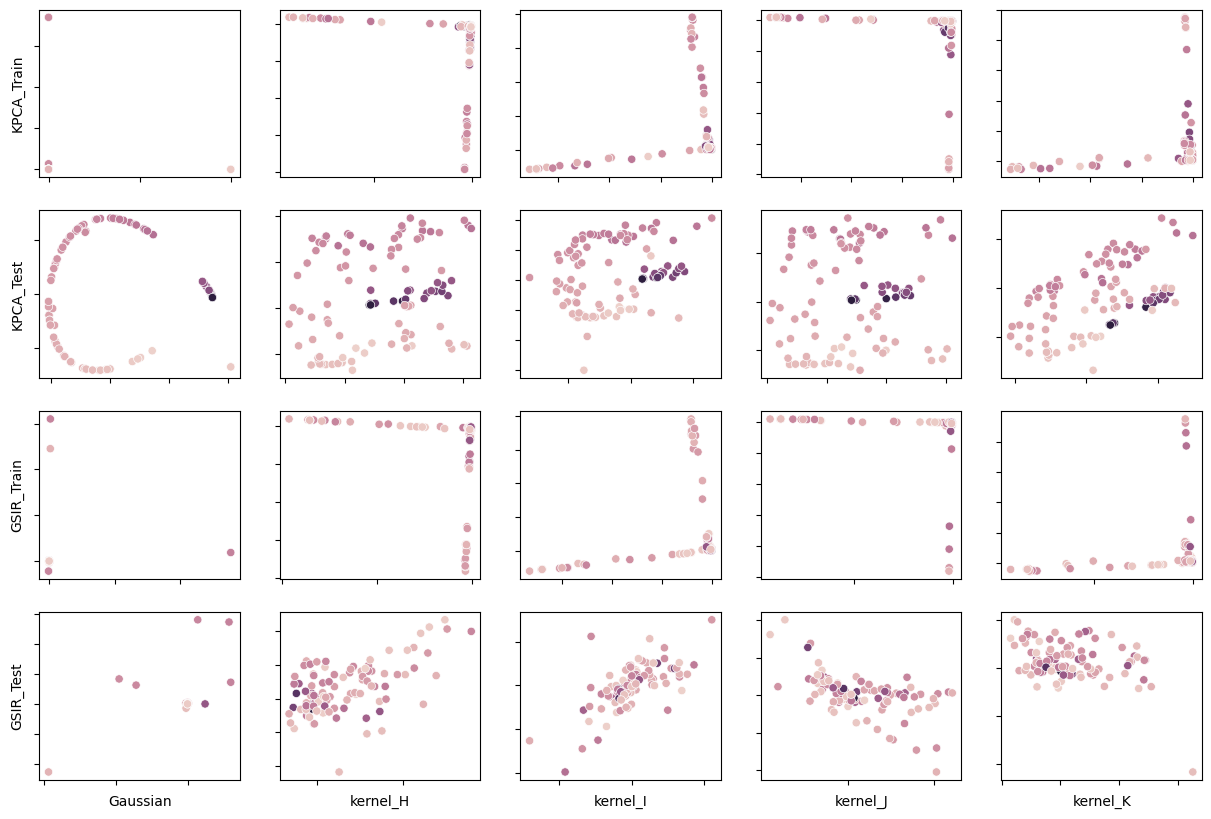

In [141]:
kernel_set = gram_kernel_set
kernel_test_set = gram_kernel_test_set
kpca = KPCA()
gsir = GSIR(0.001,0.001,type="Continuous")


data_sto_y =pd.DataFrame(datasets_y).iloc[sto_index,:].values.reshape(-1)

data_sto_test_y =pd.DataFrame(datasets_y).iloc[sto_index_test,:].values.reshape(-1)

fig,ax = plt.subplots(4,5,figsize = (15,10))
    
for i in range(5):
    kernel_matrix = kernel_set[i]
    kpca.fit(kernel_matrix)
    plot_data = pd.DataFrame(kpca.transform(kernel_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_y
    g2 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[0,i])
    g2.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    gsir.fit(kernel_matrix,data_sto_y.reshape((-1,1)))
    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_y
    g3 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[1,i])
    g3.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])


    kernel_test_matrix = kernel_test_set[i]
    plot_data = pd.DataFrame(kpca.transform(kernel_test_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_test_y
    g4 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[2,i])
    g4.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_test_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_test_y
    g5 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[3,i])
    g5.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])


ylabel_list = ["KPCA_Train","KPCA_Test","GSIR_Train","GSIR_Test"]
for i in range(4):
    ax[i,0].set(ylabel = ylabel_list[i])

xlabel_list = ["Gaussian","kernel_H","kernel_I","kernel_J","kernel_K"]
for i in range(5):
    ax[3,i].set(xlabel = xlabel_list[i])


plt.savefig(folder + "/DR_kernel.jpg")
plt.show()